# TP 6 : Modélisation

## 1. Régression linéaire simple

Pour ce premier exercice, nous manipulerons le jeu de données `cars`.

In [3]:
help(cars)

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data")
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1, log = "xy")
     title(main = "cars data (logarithmic scales)")
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     summary(fm1 <- lm(log(dist) ~ log(speed), data = cars))
     opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
                 mar = c(4.1, 4.1, 2.1, 1.1))
     plot(fm1)
     par(opar)
     
     ## An example of polynomial regression
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
         las = 1, xlim = c(0, 25))
     d <- seq(0, 25, length.out = 200)
     for(degree in 1:4) {
       fm <- lm(dist ~ poly(speed, degree), data = cars)
       assign(paste("cars", degree, sep = "."), fm)
       lines(d, predict(fm, data.frame(speed = d)), col = degree)
     }
     anova(cars.1, cars.2, cars.3, cars.4)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir des formules rappelées en cours, calculer l'équation de la droite de régression de <code>cars&dollar;dist</code> en fonction de <code>cars&dollar;speed</code>.</li>
        <li>Retrouver ce résultat directement grâce à la fonction <code>lm()</code>.</li>
        <li>Calculer la part de variance expliquée par le modèle en fonction du rapport de la variance des résidus sur la variance initiale. Cette quantité s'appelle <i>coefficient de détermination linéaire de Pearson</i> ou plus simplement $R^2$.</li>
        <li>Représenter graphiquement le nuage de points des données traversé par la droite de régression.<br>
            <center><img src="img/regression_simple.png"></center>
        </li>
    </ol>
</div>

In [4]:
# À FAIRE
a <- cov(cars$dist,cars$speed)/var(cars$speed)
b <- mean(cars$dist)-a*mean(cars$speed)
a
b

[1] 3.932409

[1] -17.57909

In [12]:
model <- lm(cars$dist ~ cars$speed)

In [14]:
summary(model)


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


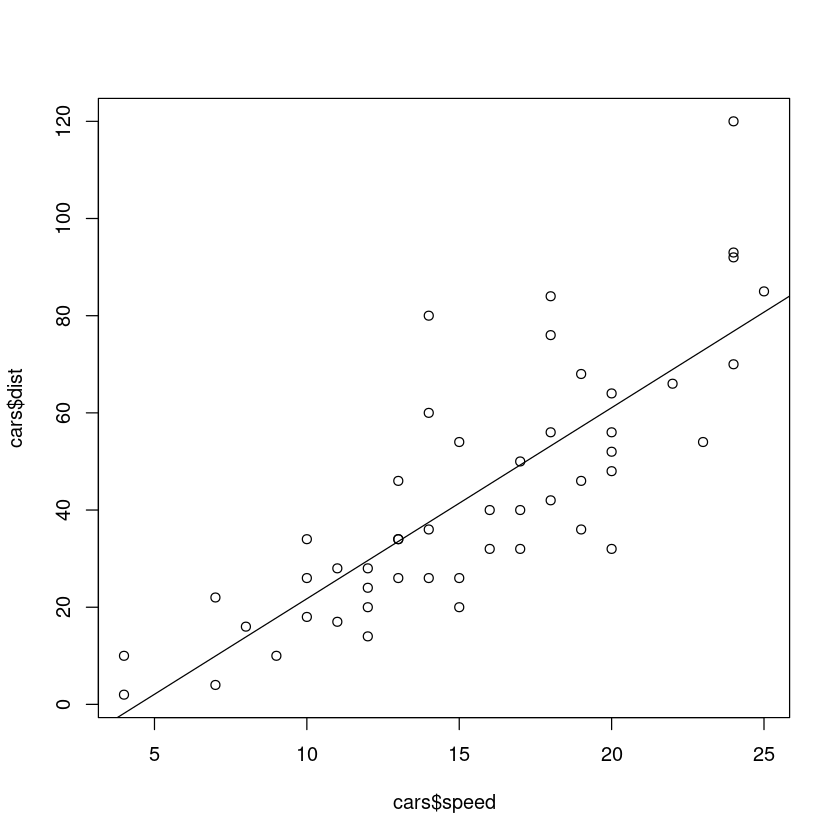

In [17]:
plot(cars$speed,cars$dist)
abline(model)

## 2. Régression linéaire multiple

Le cadre général du modèle de régression linéaire peut être donné par un vecteur $y \in \mathbb{R}^n$ contenant les $n$ observations de la *variable à expliquer* et par une matrice $X \in \mathbb{R}^{n \times p}$ contenant les $n$ observations des $p$ *variables explicatives*. Parmi les variables explicatives, une colonne de 1 est souvent ajoutée pour traiter l'ordonnée à l'origine comme les autres variables et unifier les notations. La relation recherchée se formule à l'aide du *vecteur des coefficients* $\theta \in \mathbb{R}^p$,
\begin{equation*}
y = X\theta + \varepsilon
\end{equation*}
où $\varepsilon \in \mathbb{R}^n$ est le vecteur des résidus. Des calculs similaires à ceux vus en cours pour le critère des moindres carrés donnent la formulation matricielle de l'estimateur $\hat{\theta}$ lorsque la matrice $X^\top X$ est inversible,
\begin{equation*}
\hat{\theta} = (X^\top X)^{-1} X^\top y.
\end{equation*}

Nous considérons maintenant le jeu de données `swiss`.

In [19]:
help(swiss)

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socio-economic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  Fertility         Ig,‘common standardized fertility measure’      
                                                                               
       [,2]  Agriculture       % of males involved in agriculture 
                               as occupation 
       [,3]  Examination       % draftees receiving highest mark 
                               on army examination 
       [,4]  Education         % education beyond primary school for draftees. 
       [,5]  Catholic          % ‘catholic’ (as opposed to ‘protestant’).      
       [,6]  Infant.Mortality  live births who live less than 1year.           
      
     All variables but ‘Fertility’ give proportions of the population.

_D_e_t_a_i_l_s:

     (paraphrasing Mosteller and Tukey):

     Switzerland, in 1888, was entering a period known as the
     _demographic transition_; i.e., its fertility was beginning to
     fall from the high level typical of underdeveloped countries.

     The data collected are for 47 French-speaking “provinces” at about
     1888.

     Here, all variables are scaled to [0, 100], where in the original,
     all but ‘"Catholic"’ were scaled to [0, 1].

_N_o_t_e:

     Files for all 182 districts in 1888 and other years have been
     available at <URL:
     https://opr.princeton.edu/archive/pefp/switz.aspx>.

     They state that variables ‘Examination’ and ‘Education’ are
     averages for 1887, 1888 and 1889.

_S_o_u_r_c_e:

     Project “16P5”, pages 549-551 in

     Mosteller, F. and Tukey, J. W. (1977) _Data Analysis and
     Regression: A Second Course in Statistics_.  Addison-Wesley,
     Reading Mass.

     indicating their source as “Data used by permission of Franice van
     de Walle. Office of Population Research, Princeton University,
     1976.  Unpublished data assembled under NICHD contract number No
     1-HD-O-2077.”

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(swiss, panel = panel.smooth, main = "swiss data",
           col = 3 + (swiss$Catholic > 50))
     summary(lm(Fertility ~ . , data = swiss))

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer la régression linéaire multiple modélisant la fertilité en fonction des autres variables à l'aide de la fonction <code>lm()</code>.</li>
        <li>Recalculer les coefficients de la régression par la formule matricielle donnée ci-dessus.</li>
        <li>Utiliser la fonction <code>step()</code> pour réduire la dimension du modèle en retirant les variables négligeables.</li>
    </ol>
</div>

In [26]:
# À FAIRE
model_swiss <- lm(Fertility ~ .,data=swiss)
summary(model_swiss)


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


In [31]:
x <- as.matrix(swiss)
x[,1] <- rep(10, times=47)
y <- swiss[,1]
theta <- solve(t(x)%*%x)%*%t(x)%*%y
theta

Fertility,6.6915182
Agriculture,-0.1721140
Examination,-0.2580082
Education,-0.8709401
Catholic,0.1041153
Infant.Mortality,1.0770481


In [27]:
summary(step(model_swiss))

Start:  AIC=190.69
Fertility ~ Agriculture + Examination + Education + Catholic + 
    Infant.Mortality

                   Df Sum of Sq    RSS    AIC
- Examination       1     53.03 2158.1 189.86
<none>                          2105.0 190.69
- Agriculture       1    307.72 2412.8 195.10
- Infant.Mortality  1    408.75 2513.8 197.03
- Catholic          1    447.71 2552.8 197.75
- Education         1   1162.56 3267.6 209.36

Step:  AIC=189.86
Fertility ~ Agriculture + Education + Catholic + Infant.Mortality

                   Df Sum of Sq    RSS    AIC
<none>                          2158.1 189.86
- Agriculture       1    264.18 2422.2 193.29
- Infant.Mortality  1    409.81 2567.9 196.03
- Catholic          1    956.57 3114.6 205.10
- Education         1   2249.97 4408.0 221.43



Call:
lm(formula = Fertility ~ Agriculture + Education + Catholic + 
    Infant.Mortality, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10


## 3. Analyse de variance

Dans cette dernière partie, nous utiliserons le jeu de données `iris`.

In [29]:
help(iris)

iris {datasets},R Documentation


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les boxplots de chacune des 4 variables en fonction des modalités de la variable <code>Species</code>.<br>
            <center><img src="img/iris.png"></center>
        </li>
        <li>À l'aide de la <a href="https://fr.wikipedia.org/wiki/Analyse_de_la_variance">page Wikipedia</a>, expliquer ce que cherche à faire une analyse de variance (ou ANOVA) pour une variable quantitative en fonction d'une variable catégorielle comme <code>Species</code>.</li>
        <li>Pour chaque variable quantitative du jeu de données <code>iris</code>, utiliser la fonction <code>aov()</code> puis <code>print()</code> et <code>summary()</code> sur le résultat pour appliquer l'ANOVA.</li>
    </ol>
</div>

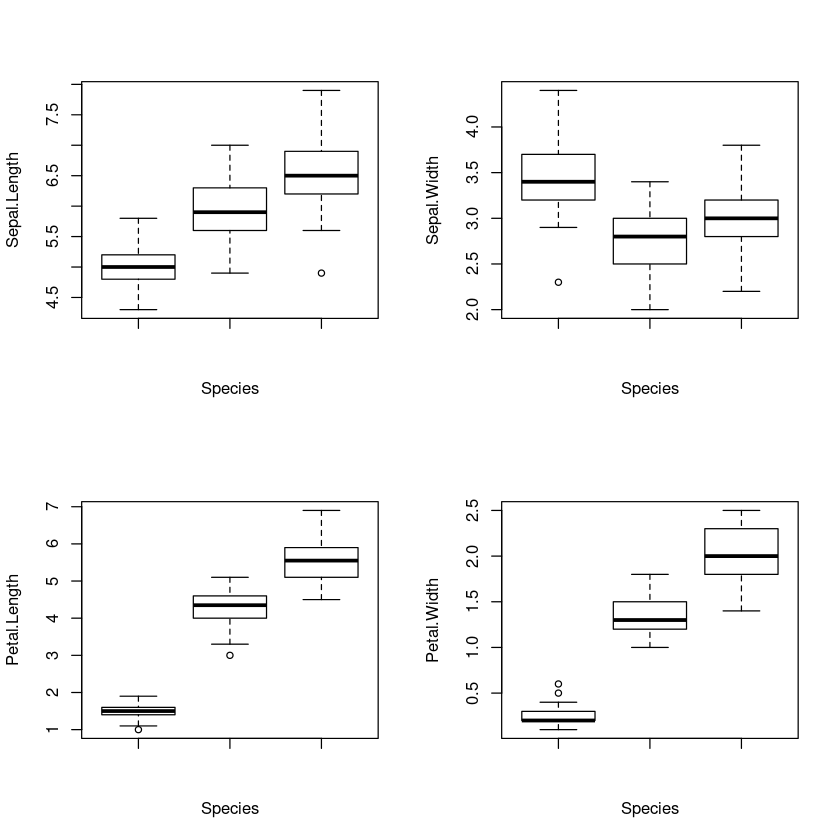

In [46]:
# À FAIRE
par(mfrow=c(2,2))
y_label <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")
for (i in 1:4){
    boxplot(iris3[,i,1],iris3[,i,2],iris3[,i,3],xlab="Species",ylab=y_label[i],col=c,show.names=TRUE)
}

In [32]:
# ensemble de modèles statistiques utilisés pour vérifier si les moyennes des groupes proviennent d'une même population

In [39]:
anova1 <- aov(Sepal.Length ~ Species,data=iris)
summary(anova1)
print(anova1)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = Sepal.Length ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  63.21213  38.95620
Deg. of Freedom        2       147

Residual standard error: 0.5147894
Estimated effects may be unbalanced


In [40]:
anova2 <- aov(Sepal.Width ~ Species,data=iris)
summary(anova2)
print(anova2)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = Sepal.Width ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  11.34493  16.96200
Deg. of Freedom        2       147

Residual standard error: 0.3396877
Estimated effects may be unbalanced


In [41]:
anova3 <- aov(Petal.Length ~ Species,data=iris)
summary(anova3)
print(anova3)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  437.1  218.55    1180 <2e-16 ***
Residuals   147   27.2    0.19                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = Petal.Length ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  437.1028   27.2226
Deg. of Freedom        2       147

Residual standard error: 0.4303345
Estimated effects may be unbalanced


In [42]:
anova4 <- aov(Petal.Width ~ Species,data=iris)
summary(anova4)
print(anova4)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  80.41   40.21     960 <2e-16 ***
Residuals   147   6.16    0.04                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = Petal.Width ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  80.41333   6.15660
Deg. of Freedom        2       147

Residual standard error: 0.20465
Estimated effects may be unbalanced
